In [12]:
import sys
sys.path.append('../../../')


In [20]:
from scripts.forecast import DataGenerator, make_photoz_bin_edges, compare_fisher_matrices 
from scripts.luminosity_functions import def_agn_xlf
import matplotlib
from scripts.utils import np, plt, set_mpl, path2plots, sns
import pandas as pd
set_mpl()
%matplotlib inline

corner_plot_args = {'linewidths': [1.5, 1.5, 2], 'shade': True,  'shade_alpha': 0.4, 'sigmas': [1], 'label_font_size': 18, 'tick_font_size': 13, 'colors': sns.color_palette('pastel').as_hex(), 
'linestyles': ['--', '--', '-']}


In [6]:
fiducial_params = {'Omega_c': 0.25, 'Omega_b': 0.05,
                   'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                   'transfer_function': 'boltzmann_camb',
                   'baryons_power_spectrum': 'nobaryons',
                   'matter_power_spectrum': 'linear'}




fluxes = [1e-14, 1.25e-14, 1.45e-14]
names = ['eRASS8[1e-14]', 'eRASS6[1.25e-14]', 'eRASS4[1.45e-14]']




In [7]:

fsky = 0.658
powspec_pars_dict_agn = {
	'f_fail': 0.1,
	'sigma_0': 0.03,
	'slim': 1e-14,
	'l_min': 10,
	'l_max': 500,
	'log_bins': 41,
	'fsky': fsky,
	'has_rsd': True,
	'use_weighed_bias': False,
	'density_multiplier': 1.3,
	'camb_llimber': 110,
	'xlf': def_agn_xlf,
	'use_camb': True,
	'delta_i': 3,
	'remove_ignored_cells': True,
}


bin_left_edges = make_photoz_bin_edges(0.5, 2.5, k=1, sigma_0= powspec_pars_dict_agn['sigma_0'])
print(bin_left_edges)
print(len(bin_left_edges))


[0.5    0.545  0.5914 0.6391 0.6883 0.7389 0.7911 0.8448 0.9001 0.9571
 1.0158 1.0763 1.1386 1.2028 1.2689 1.337  1.4071 1.4793 1.5537 1.6303
 1.7092 1.7905 1.8742 1.9604 2.0492 2.1407 2.2349 2.3319 2.4319 2.5349]
30


In [8]:
dgs = []
Fs = []

for slim, setname in zip(fluxes, names):
    print('*'*20)
    print(slim, setname)
    aps_pars = powspec_pars_dict_agn.copy()
    aps_pars['slim'] = slim
    dg =  DataGenerator(fiducial_params=fiducial_params, set_name = 'AGN: '+setname)
    dg.invoke(**aps_pars, bin_left_edges=bin_left_edges, plot_cell=False, plot_dndz=False)
    dg.invert_cov();
    F = dg.get_Fisher_matrix()[0]; 
    F = F.transform_to_Om()
    dgs.append(dg)
    Fs.append(F)

********************
1e-14 eRASS8[1e-14]
Total AGN sources: 1914915 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.03, self.f_fail=0.1
calculating CAMB...
CAMB calculation time: 1.5914900302886963


calc Covariance: 100%|██████████| 435/435 [00:01<00:00, 219.31it/s]


Start Jacobian calculation (cosmological part): jac_step=0.0005, jac_order=2
Finished Jacobian calculation (cosmological part) in 28.17 seconds
********************
1.25e-14 eRASS6[1.25e-14]
Total AGN sources: 1346620 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.03, self.f_fail=0.1
calculating CAMB...
CAMB calculation time: 2.208894968032837


calc Covariance: 100%|██████████| 435/435 [00:01<00:00, 264.67it/s]


Start Jacobian calculation (cosmological part): jac_step=0.0005, jac_order=2
Finished Jacobian calculation (cosmological part) in 35.28 seconds
********************
1.45e-14 eRASS4[1.45e-14]
Total AGN sources: 1051773 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.03, self.f_fail=0.1
calculating CAMB...
CAMB calculation time: 3.990126132965088


calc Covariance: 100%|██████████| 435/435 [00:01<00:00, 244.63it/s]


Start Jacobian calculation (cosmological part): jac_step=0.0005, jac_order=2
Finished Jacobian calculation (cosmological part) in 51.83 seconds


In [9]:
#check logNlogS slope and the consistency of the number densities
print((1e-14/1.45e-14)**1.5)
print(1051773/1914915)

print((1e-14/1.25e-14)**1.5)
print(1346620/1914915)

0.5727274472671721
0.54925310000705
0.7155417527999326
0.7032270361869848


In [17]:
fig, table_sens = compare_fisher_matrices(Fs = [x.add_prior_by_idx(2, 0.1) for x in Fs[::-1]], title = 'Optimistic',  **corner_plot_args, legend_kwargs={'title':'Survey number', 'fontsize': 20},
fsky = 0.658, factor = 1,
filename = f'{path2plots}/cosmo_forecast/fisher_matr_agn_surv_num.png')

plt.close('all')

Optimistic
$f_{\rm sky} = 0.658$
AGN: eRASS4[1.45e-14] h prior (0.1)
FoM: 2.46e+09
Omega_m: 0.300 +- 0.034 (11.4 %)
Omega_b: 0.050 +- 0.011 (22.4 %)
h: 0.700 +- 0.096 (13.7 %)
n_s: 0.960 +- 0.093 (9.7 %)
sigma_8: 0.800 +- 0.009 (1.1 %)
-------
AGN: eRASS6[1.25e-14] h prior (0.1)
FoM: 5.3e+09
Omega_m: 0.300 +- 0.029 (9.6 %)
Omega_b: 0.050 +- 0.010 (20.1 %)
h: 0.700 +- 0.094 (13.5 %)
n_s: 0.960 +- 0.083 (8.6 %)
sigma_8: 0.800 +- 0.008 (1.0 %)
-------
AGN: eRASS8[1e-14] h prior (0.1)
FoM: 1.56e+10
Omega_m: 0.300 +- 0.023 (7.5 %)
Omega_b: 0.050 +- 0.009 (17.7 %)
h: 0.700 +- 0.091 (12.9 %)
n_s: 0.960 +- 0.072 (7.5 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------


In [18]:
Fs_area = [Fs[0].add_prior_by_idx(2, 0.1),Fs[0].add_prior_by_idx(2, 0.1).rescale_by_factor(0.5), Fs[0].add_prior_by_idx(2, 0.1).rescale_by_factor(9/(13.5*2))]

_, table_area = compare_fisher_matrices(Fs = Fs_area[::-1], title = 'Optimistic',  **corner_plot_args, legend_kwargs={'title':'eRASS8 survey area', 'fontsize': 20},
fsky = 'xxx', factor = 1,
filename = f'{path2plots}/cosmo_forecast/fisher_matr_agn_surv_area.png',
names_list=['9000 deg$^2$','half extragal.', 'extragal.'])
plt.close('all')

Optimistic
$f_{\rm sky} = xxx$
AGN: eRASS8[1e-14] h prior (0.1) factor=0.333333
FoM: 9.98e+08
Omega_m: 0.300 +- 0.039 (13.1 %)
Omega_b: 0.050 +- 0.015 (30.7 %)
h: 0.700 +- 0.157 (22.4 %)
n_s: 0.960 +- 0.125 (13.1 %)
sigma_8: 0.800 +- 0.011 (1.4 %)
-------
AGN: eRASS8[1e-14] h prior (0.1) factor=0.5
FoM: 2.75e+09
Omega_m: 0.300 +- 0.032 (10.7 %)
Omega_b: 0.050 +- 0.013 (25.1 %)
h: 0.700 +- 0.128 (18.3 %)
n_s: 0.960 +- 0.102 (10.7 %)
sigma_8: 0.800 +- 0.009 (1.1 %)
-------
AGN: eRASS8[1e-14] h prior (0.1)
FoM: 1.56e+10
Omega_m: 0.300 +- 0.023 (7.5 %)
Omega_b: 0.050 +- 0.009 (17.7 %)
h: 0.700 +- 0.091 (12.9 %)
n_s: 0.960 +- 0.072 (7.5 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------


In [21]:
tbl_pd = pd.concat([table_sens, table_area])
tbl_pd.to_latex(f'{path2plots}/cosmo_forecast/fisher_surv_pars.tex', index=True, escape = False, formatters = [lambda x: x.replace('%','\\%') for i in range(6)])
tbl_pd

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_8774/2839044674.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl_pd.to_latex(f'{path2plots}/cosmo_forecast/fisher_surv_pars.tex', index=True, escape = False, formatters = [lambda x: x.replace('%','\\%') for i in range(6)])


,$\Omega_m$,$\Omega_b$,$h$,$n_s$,$\sigma_8$,FoM
AGN: eRASS4[1.45e-14] h prior (0.1),11.4%,22.4%,13.7%,9.7%,1.1%,9.39
AGN: eRASS6[1.25e-14] h prior (0.1),9.6%,20.1%,13.5%,8.6%,1.0%,9.72
AGN: eRASS8[1e-14] h prior (0.1),7.5%,17.7%,12.9%,7.5%,0.8%,10.19
AGN: eRASS8[1e-14] h prior (0.1) factor=0.333333,13.1%,30.7%,22.4%,13.1%,1.4%,9.00
AGN: eRASS8[1e-14] h prior (0.1) factor=0.5,10.7%,25.1%,18.3%,10.7%,1.1%,9.44
AGN: eRASS8[1e-14] h prior (0.1),7.5%,17.7%,12.9%,7.5%,0.8%,10.19


Optimistic
$f_{\rm sky} = 0.33$
AGN: eRASS4[1.45e-14]
FoM: 1.22e+08
Omega_m: 0.300 +- 0.051 (17.1 %)
Omega_b: 0.050 +- 0.039 (78.1 %)
h: 0.700 +- 0.482 (68.9 %)
n_s: 0.960 +- 0.307 (32.0 %)
sigma_8: 0.800 +- 0.015 (1.9 %)
-------
AGN: eRASS6[1.25e-14]
FoM: 3.14e+08
Omega_m: 0.300 +- 0.043 (14.4 %)
Omega_b: 0.050 +- 0.032 (64.8 %)
h: 0.700 +- 0.397 (56.7 %)
n_s: 0.960 +- 0.254 (26.5 %)
sigma_8: 0.800 +- 0.014 (1.8 %)
-------
AGN: eRASS8[1e-14]
FoM: 1.16e+09
Omega_m: 0.300 +- 0.034 (11.4 %)
Omega_b: 0.050 +- 0.025 (50.0 %)
h: 0.700 +- 0.303 (43.3 %)
n_s: 0.960 +- 0.196 (20.5 %)
sigma_8: 0.800 +- 0.011 (1.4 %)
-------


(<Figure size 720x720 with 25 Axes>,
                       $\Omega_m$ $\Omega_b$    $h$  $n_s$ $\sigma_8$   FoM
 AGN: eRASS4[1.45e-14]      17.1%      78.1%  68.9%  32.0%       1.9%  8.09
 AGN: eRASS6[1.25e-14]      14.4%      64.8%  56.7%  26.5%       1.8%  8.50
 AGN: eRASS8[1e-14]         11.4%      50.0%  43.3%  20.5%       1.4%  9.07)

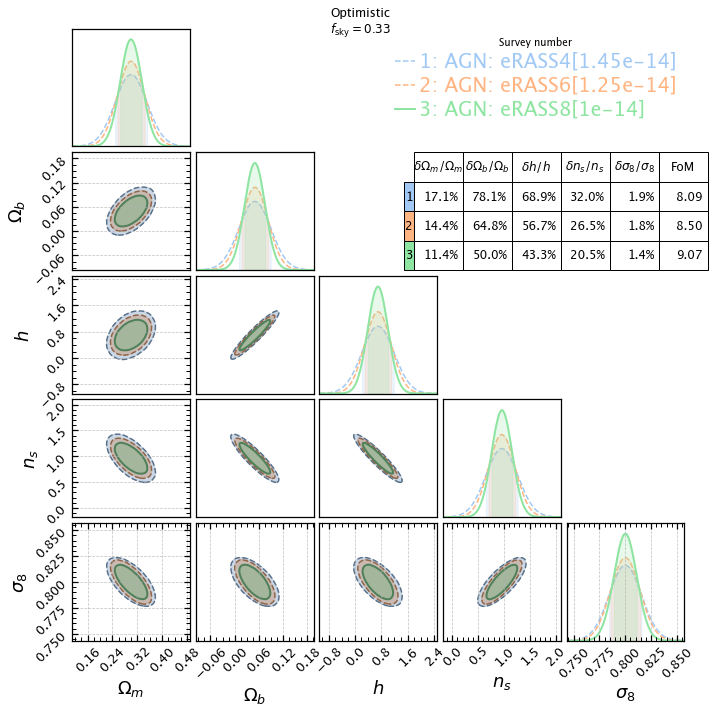

In [22]:
compare_fisher_matrices(Fs = Fs[::-1], title = 'Optimistic',  **corner_plot_args, legend_kwargs={'title':'Survey number', 'fontsize': 20},
fsky = 0.33, factor = 0.5,
filename = f'{path2plots}/talks/cosmo_forecast/fisher_matr_agn_surv_num.png')